In [2]:
# Dependencies
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint
from config import crimekey
from config import censuskey
from census import Census


In [3]:
# Set the file path
edupath = "Resources/cc_institution_details_clean.csv"

# Read the file 
edu = pd.read_csv(edupath,encoding='utf-8')
#crime = pd.read_csv(crimepath)

edu.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13.0,386.0,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13.0,106.0,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16.0,252.0,100.0|07,NaN,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,...,0.0,0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13.0,106.0,43.1|07,UAH,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13.0,386.0,88.0|07,ASU,1351.0


In [4]:
edu_df = edu[["state","level","basic","level","student_count"]]
edu_df.head()

,state,level,basic,level,student_count
0,Alabama,4-year,Masters Colleges and Universities--larger prog...,4-year,4051
1,Alabama,4-year,Research Universities--very high research acti...,4-year,11502
2,Alabama,4-year,Baccalaureate Colleges--Arts & Sciences,4-year,322
3,Alabama,4-year,Research Universities--very high research acti...,4-year,5696
4,Alabama,4-year,Masters Colleges and Universities--larger prog...,4-year,5356


In [5]:
# open population file by reading this file: census_pd.to_csv("Output/census_raw.csv")
# set the path 
Population_path = "Output/census_raw.csv"

# Read the csv file 
Populationdf = pd.read_csv(Population_path)
Populationdf.head()

,Unnamed: 0,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,0,1,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,1,2,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,2,4,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,3,5,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,4,6,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [6]:
# open edu_rate_df by reading csv file : edu_rate_df.to_csv("Output/edu_rate_df.csv", index=False, header=True)
# set the path 
Edu_rate_path = "Output/edu_rate_df.csv"

# Read the csv file 
edu_rate_df = pd.read_csv(Edu_rate_path)
edu_rate_df = edu_rate_df.rename(columns = {"% graduate":"graduate ratio (%)"})
edu_rate_df = edu_rate_df.rename(columns = {"state":"State Name"})
edu_rate_df.head()

,State Name,number of graduates,Population,graduate ratio (%)
0,Alabama,4051,4799277.0,0.084409
1,Alabama,11502,4799277.0,0.239661
2,Alabama,322,4799277.0,0.006709
3,Alabama,5696,4799277.0,0.118685
4,Alabama,5356,4799277.0,0.111600


In [7]:
# double check edu df type
edu_rate_df.dtypes

State Name              object
number of graduates      int64
Population             float64
graduate ratio (%)     float64
dtype: object

In [8]:
# groupby edu file by state in order to have common and equal state column to merge later
edu_rate = edu_rate_df.groupby("State Name")["number of graduates","Population","graduate ratio (%)"].mean()
#edu_rate = edu_rate_df.mean()
edu_rate = edu_rate.dropna()
edu_rate.head()

/var/folders/yn/xk1nllmx5_j6zx9bwj6p24kw0000gn/T/ipykernel_5018/1437734426.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  edu_rate = edu_rate_df.groupby("State Name")["number of graduates","Population","graduate ratio (%)"].mean()


,number of graduates,Population,graduate ratio (%)
State Name,,,
Alabama,3801.089552,4799277.0,0.079201
Alaska,4331.428571,720316.0,0.601323
Arizona,8881.229508,6479703.0,0.137062
Arkansas,3167.291667,2933369.0,0.107975
California,6778.982405,37659181.0,0.018001


In [9]:
#open crime report by reading csv file: statemerge.to_csv("Output/statemerge.csv", index=False, header=True)

# set the path 
crime_rate_path = "Data/censuscrimedata.csv"

# Read the csv file 
crime_rate = pd.read_csv(crime_rate_path)
crime_rate.head()

,Unnamed: 0,State,State Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Violent Crime Count,Crime Rate
0,0,1,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,9504.0,0.194904
1,1,2,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,6343.0,0.860572
2,2,4,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,31198.0,0.442506
3,3,5,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,17096.0,0.569986
4,4,6,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,173298.0,0.441147


In [10]:
# extract crime rate per state
crime_rate_df = crime_rate[["State Name","Crime Rate"]]
crime_rate_df["Crime Rate %"] = crime_rate["Crime Rate"]*100
crime_rate_df.head()

/var/folders/yn/xk1nllmx5_j6zx9bwj6p24kw0000gn/T/ipykernel_5018/2105425852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_rate_df["Crime Rate %"] = crime_rate["Crime Rate"]*100


,State Name,Crime Rate,Crime Rate %
0,Alabama,0.194904,19.490387
1,Alaska,0.860572,86.057189
2,Arizona,0.442506,44.250606
3,Arkansas,0.569986,56.998636
4,California,0.441147,44.114708


In [11]:
# merge two df together to get master_plot_df
master_plot_df = pd.merge(crime_rate_df, edu_rate, on = "State Name", how = "outer")
master_plot_df["graduate ratio (%)"]=master_plot_df["graduate ratio (%)"]*100
master_plot_df.head()

,State Name,Crime Rate,Crime Rate %,number of graduates,Population,graduate ratio (%)
0,Alabama,0.194904,19.490387,3801.089552,4799277.0,7.920130
1,Alaska,0.860572,86.057189,4331.428571,720316.0,60.132339
2,Arizona,0.442506,44.250606,8881.229508,6479703.0,13.706229
3,Arkansas,0.569986,56.998636,3167.291667,2933369.0,10.797454
4,California,0.441147,44.114708,6778.982405,37659181.0,1.800088


In [12]:
# extract above biggest 10 states to a new master_df to do analysis by conditional with .loc
masterdf = master_plot_df.loc[(master_plot_df["Population"]>=9651300)]
masterdf.head(10)

,State Name,Crime Rate,Crime Rate %,number of graduates,Population,graduate ratio (%)
4,California,0.441147,44.114708,6778.982405,37659181.0,1.800088
9,Florida,0.387984,38.798398,5542.828571,19091156.0,2.903349
10,Georgia,0.263912,26.391199,3819.817308,9810417.0,3.893634
13,Illinois,0.403316,40.331601,4761.907143,12848554.0,3.706181
22,Michigan,0.435814,43.581380,6005.902174,9886095.0,6.075101
32,New York,0.354475,35.447511,4235.406639,19487053.0,2.173446
33,North Carolina,0.356585,35.658492,3812.853846,9651380.0,3.950579
35,Ohio,0.280788,28.078838,3324.261111,11549590.0,2.878250
38,Pennsylvania,0.264018,26.401846,2844.658986,12731381.0,2.234368
43,Texas,0.429325,42.932528,6584.044335,25639373.0,2.567943


In [13]:
# get top 10 big states to do plotting | analysis | #opt2: master_plot_df.nlargest(10,"Population") to get the top 10 largest population
# opt3: master = master_plot_df.sort_values("Population",ascending=False)
#master.head(10)

In [14]:
# PLOTTING JOBS 

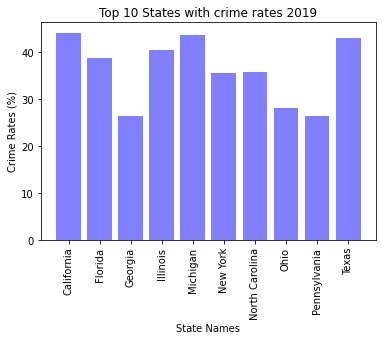

<Figure size 720x14400 with 0 Axes>

In [15]:
# use the masterdf df to implement bar chart to show the crime rates of all states in the US

#define the x and y axis by create a state_list and actuals_list from those columns
x_states = masterdf["State Name"]
y_crime = masterdf["Crime Rate %"]

plt.bar(x_states, y_crime, color='blue', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Top 10 States with crime rates 2019")
plt.xlabel("State Names")
plt.ylabel("Crime Rates (%)")
plt.figure(figsize=(10,200))
plt.savefig("Output/Crime_per_state.png")
plt.show()

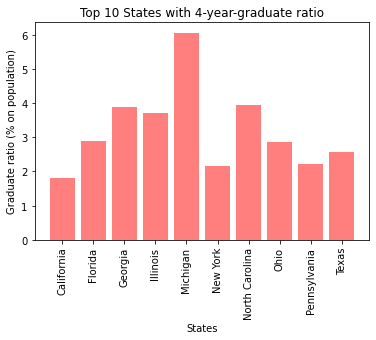

<Figure size 720x14400 with 0 Axes>

In [16]:
# same df to show the 4-year-academic-graduate ratio from Top 5 states
x_states = masterdf["State Name"]
y_graduate = masterdf["graduate ratio (%)"]
plt.bar(x_states, y_graduate, color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Top 10 States with 4-year-graduate ratio")
plt.xlabel("States")
plt.ylabel("Graduate ratio (% on population)")
plt.figure(figsize=(10,200))
plt.savefig("Output/Education_states.png")
plt.show()

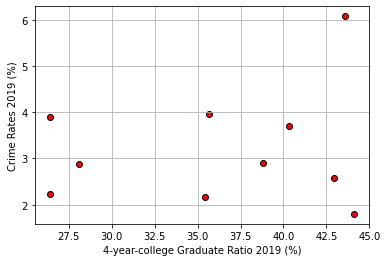

In [17]:
# find the correlation bt. education (College graduation rate per population) and crime rate
# do scatter plot first

plt.scatter(masterdf.iloc[:,2],masterdf.iloc[:,5],marker="o", facecolors="red", edgecolors="black")
plt.xlabel('4-year-college Graduate Ratio 2019 (%)')
plt.ylabel('Crime Rates 2019 (%)')
plt.savefig("Output/Crime_Education_scatter.png")
plt.grid()
plt.show()

In [18]:
# correlation | for every change of the y then the x would change in 2 times (2x) | y = 2x | y = -0.65x 
# the higher the number, the closer the relationship | must be -1 < correlation < 1 (from 0.5 is good relationship)
Graduation = masterdf.iloc[:,5]
Crime = masterdf.iloc[:,2]
correlation = st.pearsonr(Graduation,Crime)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.16


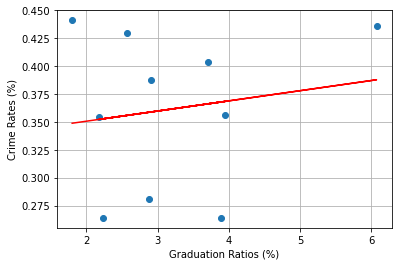

In [22]:
# Add the linear regression equation and line to plot | y = -0.45x 
x_values = masterdf["graduate ratio (%)"]
y_values = masterdf["Crime Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Graduation Ratios (%)")
plt.ylabel("Crime Rates (%)")
plt.savefig("Output/Regression_Crime_Education.png")
plt.grid()
plt.show()

In [20]:
x_values = masterdf["graduate ratio (%)"]
y_values = masterdf["Crime Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.01x + 0.33


In [21]:
# Analysis: pls refer to presentation slides and readme file. 